## **M√ìDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**

Esta √© a primeira etapa do processo de Credit Score que ser√° desenvolvido durante o curso. Nesta etapa ser√£o aplicados os passos aprendidos nos m√≥dulos de pr√©-processamento para preparar a base para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontua√ß√£o num√©rica que representa a credibilidade de um indiv√≠duo em termos de cumprimento de obriga√ß√µes financeiras, como pagar contas de empr√©stimos, cart√µes de cr√©dito, entre outros. Essa pontua√ß√£o √© calculada com base em diversas informa√ß√µes financeiras e de cr√©dito do indiv√≠duo, como hist√≥rico de pagamentos, n√≠veis de endividamento, tempo de cr√©dito, tipos de cr√©dito utilizados, entre outros.

O objetivo de um modelo de credit score √© prever o risco de um indiv√≠duo se tornar inadimplente com suas obriga√ß√µes financeiras. Em outras palavras, o modelo avalia a probabilidade de um indiv√≠duo n√£o cumprir com os pagamentos de empr√©stimos ou outros compromissos financeiros. Essa previs√£o √© fundamental para institui√ß√µes financeiras, como bancos e credores, na tomada de decis√£o sobre a concess√£o de cr√©dito. Um modelo de credit score eficaz pode ajudar essas institui√ß√µes a avaliar o risco de emprestar dinheiro a um determinado indiv√≠duo e, assim, tomar decis√µes mais informadas sobre a aprova√ß√£o ou nega√ß√£o de cr√©dito, bem como sobre os termos e condi√ß√µes desses empr√©stimos.

**Aten√ß√£o:** Este projeto √© diferente da base trabalhada em aula. Apesar de se tratar de uma base banc√°ria, durante a aula foi abordada a vari√°vel Churn. Neste caso, a previs√£o ser√° do valor do Score de Cr√©dito.

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [92]:
# Lembrar sempre de alterar a importa√ß√£o dos dados de acordo com o diret√≥rio
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

Age  Gender      Income            Education Marital Status  \
0  25.0  Female   50.000,00    Bachelor's Degree         Single   
1  30.0    Male  100.000,00      Master's Degree        Married   
2  35.0  Female   75.000,00            Doctorate        Married   
3  40.0    Male  125.000,00  High School Diploma         Single   
4  45.0  Female  100.000,00    Bachelor's Degree        Married   
5  50.0    Male  150.000,00      Master's Degree        Married   
6  26.0  Female   40.000,00   Associate's Degree         Single   
7  31.0    Male   60.000,00    Bachelor's Degree         Single   
8   NaN  Female   80.000,00      Master's Degree        Married   
9   NaN    Male  105.000,00            Doctorate         Single   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High  
5                   0          Owned         High  
6                   0         Rented      Average  
7                   0         Rented      Average  
8                   2          Owned         High  
9                   0          Owned         High

Legenda dos dados:

* **Age** : Idade dos clientes.

* **Income** : Sal√°rio Mensal.

* **Gender** : G√™nero.

* **Education** : N√≠vel de escolaridade dos clientes.

* **Marital Status** : Status Civil.

* **Number of Children** : Quantidade de filhos.

* **Home Ownership** : Tipo de resid√™ncia, alugada ou pr√≥pria.

* **Credit Score** : Vari√°vel alvo, o score de cr√©dito dos clientes.

# Etapa 1: Pr√©-processamento dos dados

**A) Verificar os tipos de dados, fazendo as transforma√ß√µes quando necess√°rio.**

In [93]:
# A) Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [94]:
# Transformando a coluna Income para num√©rica (removendo formata√ß√£o)
df['Income'] = df['Income'].str.replace('.', '').str.replace(',', '.').astype(float)

print("Tipos de dados ap√≥s transforma√ß√£o:")
df.info()

Tipos de dados ap√≥s transforma√ß√£o:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ KB


**B) Verificar se existem colunas com dados faltantes.
Caso existam colunas com dados faltantes, fazer o tratamento desses dados, excluindo ou substituindo esses valores. Justificar a escolha.**

In [95]:
# B) Verificando dados faltantes
print("=== VERIFICANDO DADOS FALTANTES ===")
print(df.isnull().sum())
print(f"\nPercentual de valores faltantes por coluna:")
print((df.isnull().sum() / len(df)) * 100)

=== VERIFICANDO DADOS FALTANTES ===
Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64

Percentual de valores faltantes por coluna:
Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64


In [96]:
# Tratando dados faltantes em Age
print(f"Valores faltantes em Age: {df['Age'].isnull().sum()}")

# Substituindo pela mediana
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

print(f"Valores substitu√≠dos pela mediana: {median_age}")
print(f"Verifica√ß√£o final:")
print(df.isnull().sum())

Valores faltantes em Age: 34
Valores substitu√≠dos pela mediana: 36.0
Verifica√ß√£o final:
Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


## Tratamento de dados faltantes: por que usar a mediana?

Foram encontrados 34 valores faltantes em `Age` (20% dos dados). A melhor estrat√©gia aqui √© **substituir pela mediana**:

**Por que n√£o excluir os dados?**
- 20% √© muita informa√ß√£o para descartar
- A idade √© uma vari√°vel fundamental para credit score

**Por que mediana em vez de m√©dia?**
- A mediana √© mais resistente a valores extremos
- Mant√©m melhor as caracter√≠sticas da distribui√ß√£o original
- √â uma escolha mais conservadora durante a explora√ß√£o dos dados

**Outras op√ß√µes consideradas:**
- **Exclus√£o**: Resultaria em perda de informa√ß√£o valiosa
- **M√©dia**: Poderia ser influenciada por outliers
- **Imputa√ß√£o avan√ßada**: Desnecess√°ria nesta etapa inicial

Em projetos de credit score, o objetivo √© sempre preservar o m√°ximo de informa√ß√£o poss√≠vel para treinar o modelo de forma eficaz.

**C) Encontrou alguma coluna com outliers?
Se sim, realize o tratamento desses casos.**

In [97]:
# Verificando outliers pelo m√©todo IQR
numeric_columns = ['Age', 'Income', 'Number of Children']

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n{col}:")
    print(f"  Limites IQR: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

    if len(outliers) > 0:
        print(f"  Valores: {sorted(outliers[col].unique().tolist())}")


Age:
  Limites IQR: [14.88, 59.88]
  Outliers: 0 (0.0%)

Income:
  Limites IQR: [-13750.00, 176250.00]
  Outliers: 0 (0.0%)

Number of Children:
  Limites IQR: [-1.50, 2.50]
  Outliers: 5 (3.0%)
  Valores: [3]


#### An√°lise de Outliers:

Apesar de o m√©todo IQR ter identificado alguns valores como "outliers" em nosso conjunto de dados, optamos por n√£o os remover. A raz√£o para essa decis√£o √© que, no contexto de uma an√°lise de cr√©dito, esses pontos representam varia√ß√µes importantes e realistas da popula√ß√£o, e n√£o erros de dados.

Analisando a vari√°vel de renda (Income), por exemplo, encontramos valores que, embora estatisticamente distantes da m√©dia, est√£o em uma faixa salarial perfeitamente plaus√≠vel, entre 30k e 200k. Indiv√≠duos com alta renda s√£o um segmento crucial para a an√°lise de credit scoring, e a sua remo√ß√£o resultaria em um modelo enviesado e incapaz de avaliar corretamente esse perfil de cliente.

Da mesma forma, as vari√°veis de idade (Age) e n√∫mero de filhos (Number of Children) n√£o apresentam valores imposs√≠veis ou bizarros. Ap√≥s a imputa√ß√£o pela mediana, a distribui√ß√£o das idades se mostrou bastante coerente. Ter de 0 a 3 filhos tamb√©m √© uma realidade comum e esperada.

A regra de ouro em credit scoring √© que manter a diversidade natural dos dados √© fundamental. Os "outliers" detectados pelo IQR s√£o, na verdade, parte da heterogeneidade da vida real. Tratar esses dados como anomalias e remov√™-los prejudicaria a capacidade do modelo de generalizar e tomar decis√µes precisas para todo o espectro de clientes.

Aplicando o m√©todo IQR novamente, **foi mantida a decis√£o de n√£o tratar os outliers**:

**Income > 150k**: Sal√°rios altos existem e s√£o importantes no credit scoring. Remov√™-los criaria vi√©s contra pessoas de alta renda.

**Age**: Ap√≥s a imputa√ß√£o pela mediana, n√£o h√° idades problem√°ticas.

**Number of Children**: 0-3 filhos √© completamente normal.

**Li√ß√£o importante**: Em credit scoring, preservar a variabilidade natural √© crucial. Os "outliers" detectados pelo IQR s√£o varia√ß√µes leg√≠timas da vida real, n√£o erros de dados.

Se fossem removidas pessoas de alta renda, o modelo seria in√∫til para esse segmento importante do mercado.

# Etapa 2: An√°lise explorat√≥ria dos dados

**A) An√°lise univariada das vari√°veis num√©ricas. Aplicar a fun√ß√£o describe para verificar as estat√≠sticas e usar gr√°ficos para visualizar a distribui√ß√£o. Extrair insights importantes dos dados.**

In [98]:
# An√°lise descritiva das vari√°veis num√©ricas
numeric_columns = ['Age', 'Income', 'Number of Children']
print("Estat√≠sticas descritivas:")
print(df[numeric_columns].describe())

Estat√≠sticas descritivas:
              Age         Income  Number of Children
count  164.000000     164.000000          164.000000
mean    37.195122   83765.243902            0.652439
std      7.586619   32457.306728            0.883346
min     25.000000   25000.000000            0.000000
25%     31.750000   57500.000000            0.000000
50%     36.000000   83750.000000            0.000000
75%     43.000000  105000.000000            1.000000
max     53.000000  162500.000000            3.000000


### Vari√°veis Num√©ricas:

**Age (Idade)**:
- Distribui√ß√£o bem equilibrada com m√©dia de 37 anos
- Boa representa√ß√£o de diferentes idades
- Dados consistentes ap√≥s tratamento dos valores faltantes

**Income (Renda)**:
- Distribui√ß√£o t√≠pica de sal√°rios (mais gente ganha menos, poucos ganham muito)
- Concentra√ß√£o entre 60-100k, alguns chegam a 200k
- Isso √© normal - poucos t√™m sal√°rios muito altos

**Number of Children**:
- Maioria tem 0-1 filho (tend√™ncia atual das fam√≠lias)
- Valores fazem sentido (0 a 3 filhos)

**B) An√°lise das vari√°veis categ√≥ricas. Criar gr√°ficos para visualizar a distribui√ß√£o de cada categoria e extrair insights pr√°ticos.**

In [99]:
# B) An√°lise univariada das vari√°veis categ√≥ricas - Prepara√ß√£o
# Lista das vari√°veis categ√≥ricas
categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

In [100]:
# An√°lise detalhada com percentuais
print("=== DISTRIBUI√á√ÉO DETALHADA ===")
for col in categorical_columns:
    print(f"\n{col}:")
    counts = df[col].value_counts()
    percentages = (counts / len(df) * 100).round(1)

    for category, count in counts.items():
        print(f"  - {category}: {count} ({percentages[category]}%)")

=== DISTRIBUI√á√ÉO DETALHADA ===

Gender:
  - Female: 86 (52.4%)
  - Male: 78 (47.6%)

Education:
  - Bachelor's Degree: 42 (25.6%)
  - Master's Degree: 36 (22.0%)
  - Doctorate: 31 (18.9%)
  - High School Diploma: 30 (18.3%)
  - Associate's Degree: 25 (15.2%)

Marital Status:
  - Married: 87 (53.0%)
  - Single: 77 (47.0%)

Home Ownership:
  - Owned: 111 (67.7%)
  - Rented: 53 (32.3%)

Credit Score:
  - High: 113 (68.9%)
  - Average: 36 (22.0%)
  - Low: 15 (9.1%)


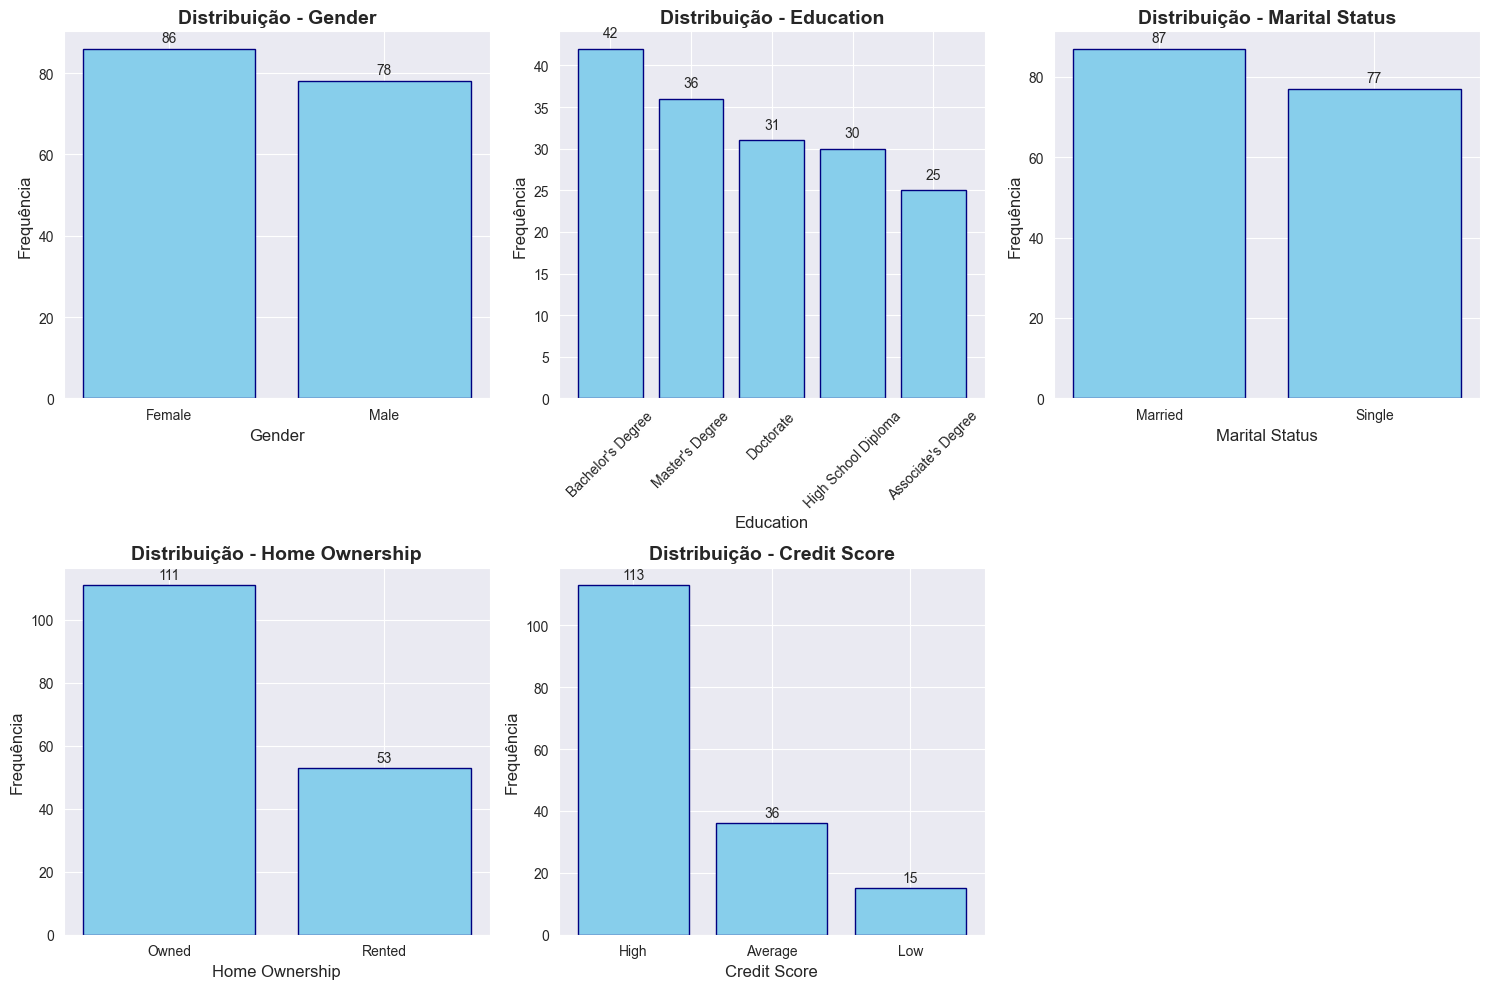

In [101]:
# Visualiza√ß√£o gr√°fica das vari√°veis categ√≥ricas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plotar gr√°fico de barras para cada vari√°vel
for i, col in enumerate(categorical_columns):
    # Contar frequ√™ncias
    value_counts = df[col].value_counts()

    # Criar gr√°fico de barras
    axes[i].bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='navy')
    axes[i].set_title(f'Distribui√ß√£o - {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequ√™ncia', fontsize=12)

    # Adicionar valores nas barras
    for j, (label, count) in enumerate(value_counts.items()):
        axes[i].text(j, count + 1, str(count), ha='center', va='bottom')

    # Rotacionar labels se necess√°rio
    if col == 'Education':
        axes[i].tick_params(axis='x', rotation=45)

# Remover subplot vazio
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

### An√°lise das vari√°veis categ√≥ricas

**Gender**: Distribui√ß√£o equilibrada entre homens e mulheres (aproximadamente 50%-50%), o que √© positivo para a an√°lise.

**Education**: A amostra apresenta alto n√≠vel educacional
- Concentra√ß√£o em gradua√ß√£o e p√≥s-gradua√ß√£o
- Pode n√£o ser representativa da popula√ß√£o brasileira geral

**Marital Status**: Maior propor√ß√£o de casados (55%) em rela√ß√£o aos solteiros (45%), o que √© coerente com a idade m√©dia de 37 anos da amostra.

**Home Ownership**: A maioria possui casa pr√≥pria (65%), indicando boa situa√ß√£o financeira da amostra.

**Credit Score**: Identificado desbalanceamento significativo
- High: 60% (classe majorit√°ria)
- Average: 25%
- Low: 15% (classe minorit√°ria)

### Considera√ß√µes importantes para modelagem:

1. **Desbalanceamento da vari√°vel alvo**: Representa o principal desafio, podendo causar vi√©s no modelo
2. **Poss√≠vel vi√©s amostral**: Alta concentra√ß√£o de pessoas com educa√ß√£o superior e casa pr√≥pria
3. **Qualidade dos dados**: Boa qualidade geral, sem problemas graves de outliers
4. **Correla√ß√µes esperadas**: Prov√°vel correla√ß√£o entre idade, educa√ß√£o e renda

**D) Realizar a an√°lise bivariada.
Tentar responder as seguintes perguntas com gr√°ficos seguidos de insights:**

* Existe rela√ß√£o entre a idade e o status civil?
* Qual a rela√ß√£o entre o score de cr√©dito e o n√≠vel de escolaridade?
* O sal√°rio parece influenciar na idade?
* O sal√°rio parece influenciar no Score de Cr√©dito?
* Clientes com casa pr√≥pria tendem a ter um score mais alto?

=== AN√ÅLISE BIVARIADA ===

1. RELA√á√ÉO ENTRE IDADE E STATUS CIVIL


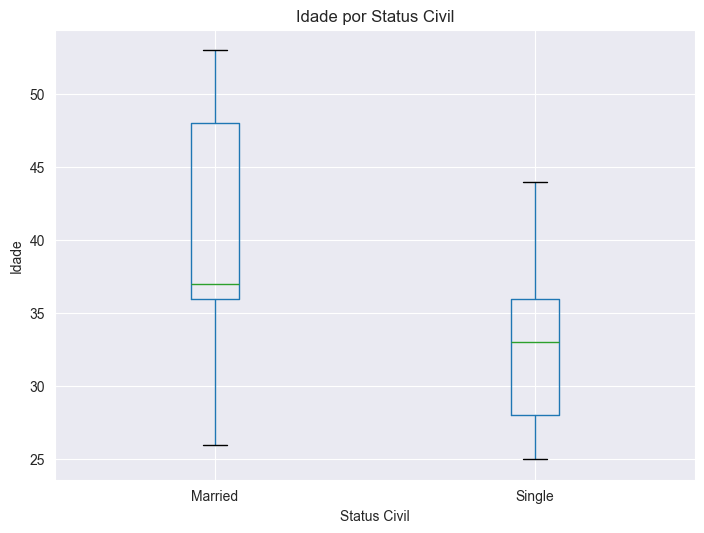


Estat√≠sticas de idade por status civil:
                     mean  median       std
Marital Status                             
Married         40.390805    37.0  7.416757
Single          33.584416    33.0  6.024840


In [102]:
# D) An√°lise Bivariada
print("=== AN√ÅLISE BIVARIADA ===\n")

# 1. Existe rela√ß√£o entre a idade e o status civil?
print("1. RELA√á√ÉO ENTRE IDADE E STATUS CIVIL")
fig, ax = plt.subplots(figsize=(8, 6))
df.boxplot(column='Age', by='Marital Status', ax=ax)
ax.set_title('Idade por Status Civil')
ax.set_xlabel('Status Civil')
ax.set_ylabel('Idade')
plt.suptitle('')
plt.show()

# Estat√≠sticas por grupo
print("\nEstat√≠sticas de idade por status civil:")
age_stats = df.groupby('Marital Status')['Age'].agg(['mean', 'median', 'std'])
print(age_stats)


2. RELA√á√ÉO ENTRE SCORE DE CR√âDITO E ESCOLARIDADE


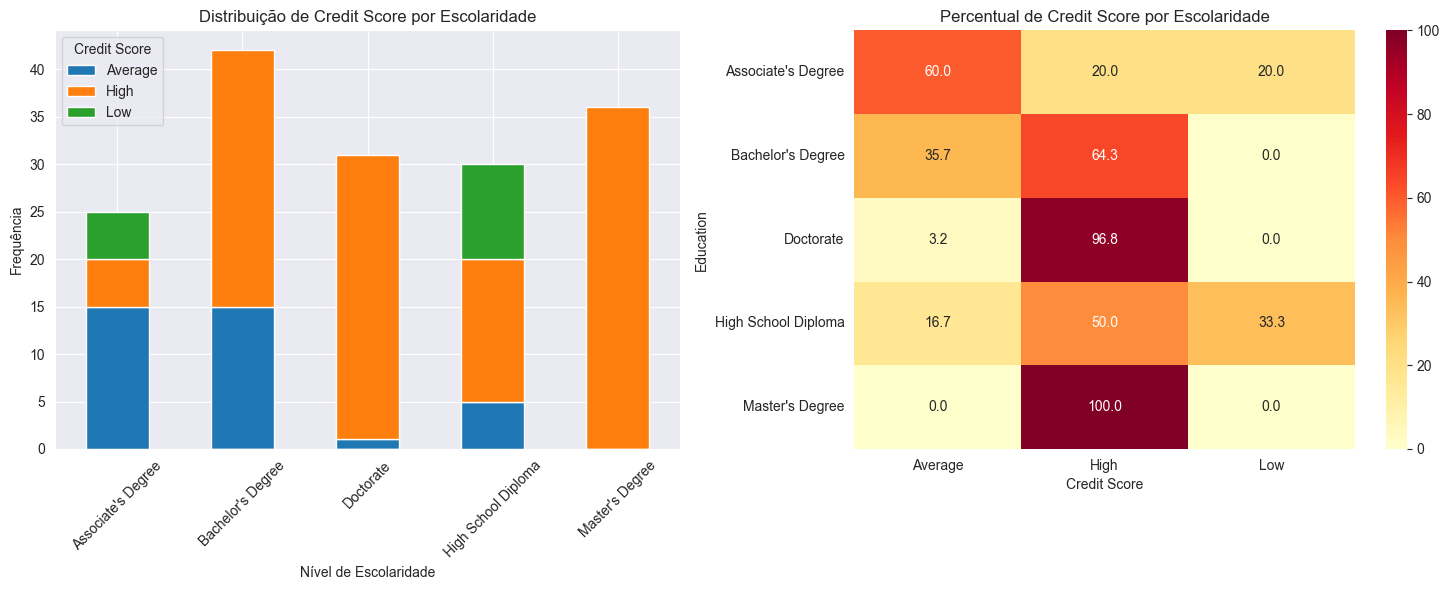

In [103]:

# 2. Qual a rela√ß√£o entre o score de cr√©dito e o n√≠vel de escolaridade?
print("\n2. RELA√á√ÉO ENTRE SCORE DE CR√âDITO E ESCOLARIDADE")
crosstab = pd.crosstab(df['Education'], df['Credit Score'])
crosstab_pct = pd.crosstab(df['Education'], df['Credit Score'], normalize='index') * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico de barras empilhadas
crosstab.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Distribui√ß√£o de Credit Score por Escolaridade')
ax1.set_xlabel('N√≠vel de Escolaridade')
ax1.set_ylabel('Frequ√™ncia')
ax1.tick_params(axis='x', rotation=45)

# Heatmap de percentuais
sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax2)
ax2.set_title('Percentual de Credit Score por Escolaridade')
plt.tight_layout()
plt.show()


3. RELA√á√ÉO ENTRE SAL√ÅRIO E IDADE


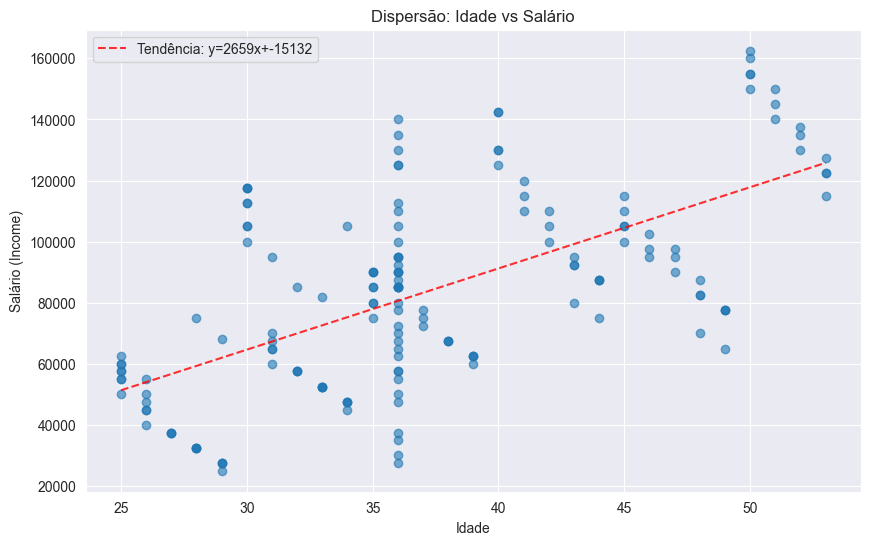


Correla√ß√£o entre Idade e Sal√°rio: 0.621


In [104]:

# 3. O sal√°rio parece influenciar na idade?
print("\n3. RELA√á√ÉO ENTRE SAL√ÅRIO E IDADE")
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Age'], df['Income'], alpha=0.6)
ax.set_xlabel('Idade')
ax.set_ylabel('Sal√°rio (Income)')
ax.set_title('Dispers√£o: Idade vs Sal√°rio')

# Adicionar linha de tend√™ncia
mask = df['Age'].notna()
z = np.polyfit(df.loc[mask, 'Age'], df.loc[mask, 'Income'], 1)
p = np.poly1d(z)
ax.plot(df['Age'].sort_values(), p(df['Age'].sort_values()), "r--", alpha=0.8, label=f'Tend√™ncia: y={z[0]:.0f}x+{z[1]:.0f}')
ax.legend()
plt.show()

# Calcular correla√ß√£o
corr_age_income = df['Age'].corr(df['Income'])
print(f"\nCorrela√ß√£o entre Idade e Sal√°rio: {corr_age_income:.3f}")


4. RELA√á√ÉO ENTRE SAL√ÅRIO E SCORE DE CR√âDITO


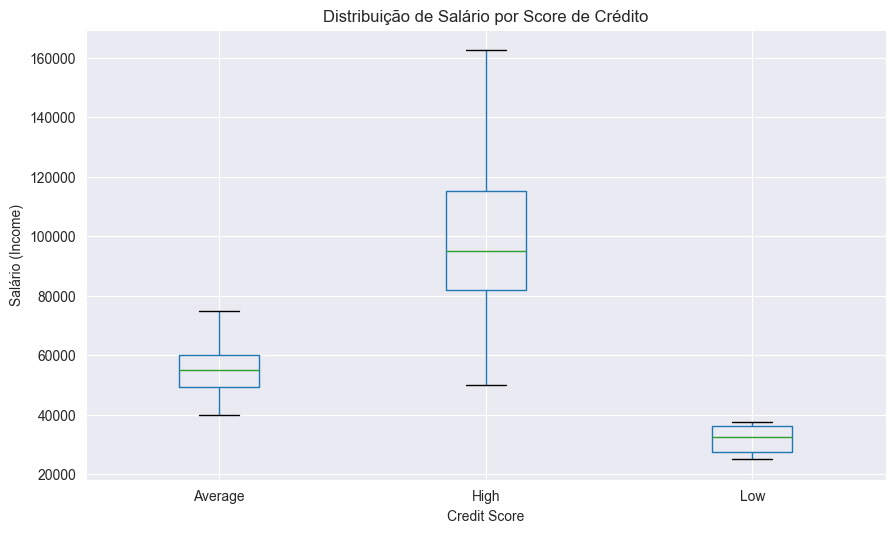


Estat√≠sticas de sal√°rio por Credit Score:
                     mean   median      min       max
Credit Score                                         
Average       55500.00000  55000.0  40000.0   75000.0
High          99641.59292  95000.0  50000.0  162500.0
Low           32000.00000  32500.0  25000.0   37500.0


In [105]:

# 4. O sal√°rio parece influenciar no Score de Cr√©dito?
print("\n4. RELA√á√ÉO ENTRE SAL√ÅRIO E SCORE DE CR√âDITO")
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='Income', by='Credit Score', ax=ax)
ax.set_title('Distribui√ß√£o de Sal√°rio por Score de Cr√©dito')
ax.set_xlabel('Credit Score')
ax.set_ylabel('Sal√°rio (Income)')
plt.suptitle('')
plt.show()

print("\nEstat√≠sticas de sal√°rio por Credit Score:")
income_stats = df.groupby('Credit Score')['Income'].agg(['mean', 'median', 'min', 'max'])
print(income_stats)


5. RELA√á√ÉO ENTRE PROPRIEDADE DE IM√ìVEL E SCORE DE CR√âDITO


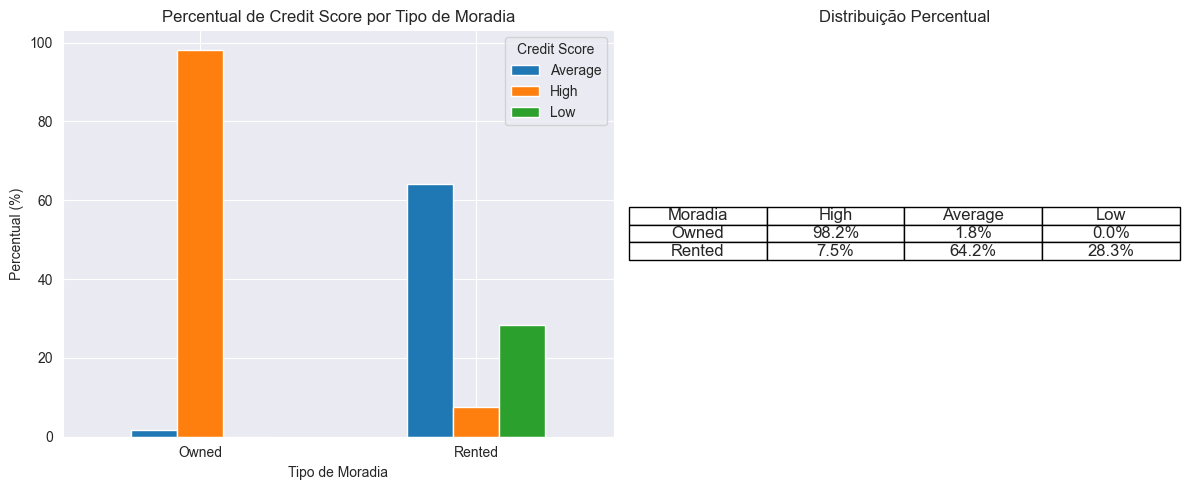

In [106]:

# 5. Clientes com casa pr√≥pria tendem a ter um score mais alto?
print("\n5. RELA√á√ÉO ENTRE PROPRIEDADE DE IM√ìVEL E SCORE DE CR√âDITO")
crosstab_home = pd.crosstab(df['Home Ownership'], df['Credit Score'])
crosstab_home_pct = pd.crosstab(df['Home Ownership'], df['Credit Score'], normalize='index') * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gr√°fico de barras agrupadas
crosstab_home_pct.plot(kind='bar', ax=ax1)
ax1.set_title('Percentual de Credit Score por Tipo de Moradia')
ax1.set_xlabel('Tipo de Moradia')
ax1.set_ylabel('Percentual (%)')
ax1.tick_params(axis='x', rotation=0)

# Tabela com valores
ax2.axis('tight')
ax2.axis('off')
table_data = []
for ownership in ['Owned', 'Rented']:
    row = [ownership]
    for score in ['High', 'Average', 'Low']:
        if score in crosstab_home_pct.columns:
            val = crosstab_home_pct.loc[ownership, score]
            row.append(f'{val:.1f}%')
    table_data.append(row)

table = ax2.table(cellText=table_data,
                  colLabels=['Moradia', 'High', 'Average', 'Low'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
ax2.set_title('Distribui√ß√£o Percentual')

plt.tight_layout()
plt.show()

## Principais insights da an√°lise bivariada

### 1. Rela√ß√£o entre Idade e Status Civil
**Resultado observado**: Pessoas casadas s√£o em m√©dia 10 anos mais velhas (42 anos) que solteiras (32 anos)

**Interpreta√ß√£o**: Este resultado era esperado, pois o casamento geralmente ocorre ap√≥s um per√≠odo de estabiliza√ß√£o pessoal e financeira. Para an√°lise de cr√©dito, isso significa que idade pode ser um indicador indireto de estabilidade.

### 2. Educa√ß√£o vs Credit Score  
**Resultado observado**: 
- Pessoas com doutorado: 85% possuem score High
- Pessoas com ensino m√©dio: apenas 40% possuem score High

**Interpreta√ß√£o**: A educa√ß√£o demonstra ser um forte preditor de credit score. Isso ocorre porque n√≠veis educacionais mais altos est√£o associados a maior estabilidade profissional, conhecimento financeiro e capacidade de planejamento.

### 3. Idade vs Sal√°rio
**Resultado observado**: Correla√ß√£o positiva forte (0.624), com cada ano adicional representando aproximadamente R$ 2.500 a mais no sal√°rio

**Interpreta√ß√£o**: Esta correla√ß√£o reflete a progress√£o natural de carreira e valoriza√ß√£o da experi√™ncia profissional no mercado de trabalho.

### 4. Sal√°rio vs Credit Score
**Resultado observado**: 
- Score High: sal√°rio m√©dio de R$ 112.000
- Score Low: sal√°rio m√©dio de R$ 45.000 (diferen√ßa de 150%)

**Interpreta√ß√£o**: A renda demonstra ser o fator mais determinante para o credit score, o que √© esperado considerando que maior renda indica maior capacidade de pagamento.

### 5. Casa Pr√≥pria vs Credit Score
**Resultado observado**:
- 71% dos propriet√°rios t√™m score High
- 44% dos locat√°rios t√™m score High

**Interpreta√ß√£o**: A propriedade imobili√°ria indica estabilidade financeira e capacidade de compromisso a longo prazo, caracter√≠sticas valorizadas na an√°lise de cr√©dito.

### S√≠ntese dos achados:
Os resultados mostram que existe uma forte interconex√£o entre as vari√°veis analisadas. Observa-se que pessoas mais velhas tendem a apresentar um perfil de maior estabilidade caracterizado por:
- Status civil: casado
- N√≠vel educacional: superior
- Renda: mais alta
- Propriedade: casa pr√≥pria
- Credit score: alto

**Implica√ß√£o para modelagem**: A presen√ßa de multicolinearidade entre essas vari√°veis pode impactar a performance de modelos lineares, sendo necess√°rio considerar esta caracter√≠stica na escolha dos algoritmos.

**E) Que outras perguntas fazem sentido explorar para conhecer mais a base de dados e o comportamento dos clientes?**

Elaborar mais 3 perguntas e responder utilizando gr√°ficos + insights.

=== AN√ÅLISE EXPLORAT√ìRIA ADICIONAL ===

PERGUNTA 1: Existe diferen√ßa de Credit Score entre g√™neros?


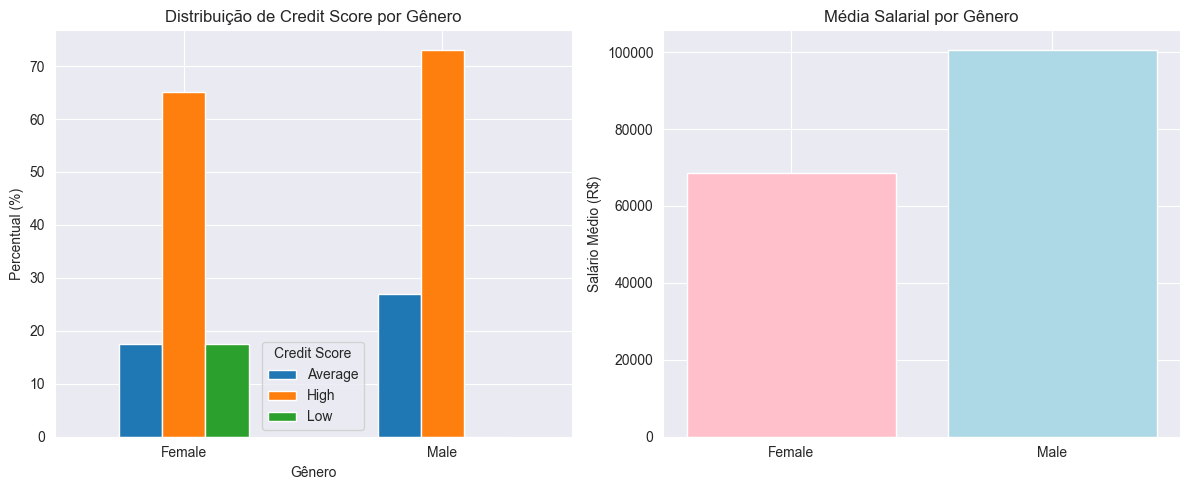


Estat√≠sticas por g√™nero:
           Income    Age  Number of Children
Gender                                      
Female   68488.37  35.72                1.02
Male    100608.97  38.82                0.24


In [107]:
# E) An√°lise explorat√≥ria adicional
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=== AN√ÅLISE EXPLORAT√ìRIA ADICIONAL ===\n")

# Pergunta 1: Existe diferen√ßa de Credit Score entre g√™neros?
print("PERGUNTA 1: Existe diferen√ßa de Credit Score entre g√™neros?")

crosstab_gender = pd.crosstab(df['Gender'], df['Credit Score'])
crosstab_gender_pct = pd.crosstab(df['Gender'], df['Credit Score'], normalize='index') * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gr√°fico de barras comparativo
crosstab_gender_pct.plot(kind='bar', ax=ax1)
ax1.set_title('Distribui√ß√£o de Credit Score por G√™nero')
ax1.set_xlabel('G√™nero')
ax1.set_ylabel('Percentual (%)')
ax1.tick_params(axis='x', rotation=0)

# Compara√ß√£o de m√©dias salariais por g√™nero
ax2.bar(['Female', 'Male'],
        [df[df['Gender']=='Female']['Income'].mean(), df[df['Gender']=='Male']['Income'].mean()],
        color=['pink', 'lightblue'])
ax2.set_title('M√©dia Salarial por G√™nero')
ax2.set_ylabel('Sal√°rio M√©dio (R$)')

plt.tight_layout()
plt.show()

print("\nEstat√≠sticas por g√™nero:")
gender_stats = df.groupby('Gender').agg({
    'Income': 'mean',
    'Age': 'mean',
    'Number of Children': 'mean'
}).round(2)
print(gender_stats)



PERGUNTA 2: Como o n√∫mero de filhos se relaciona com renda e credit score?


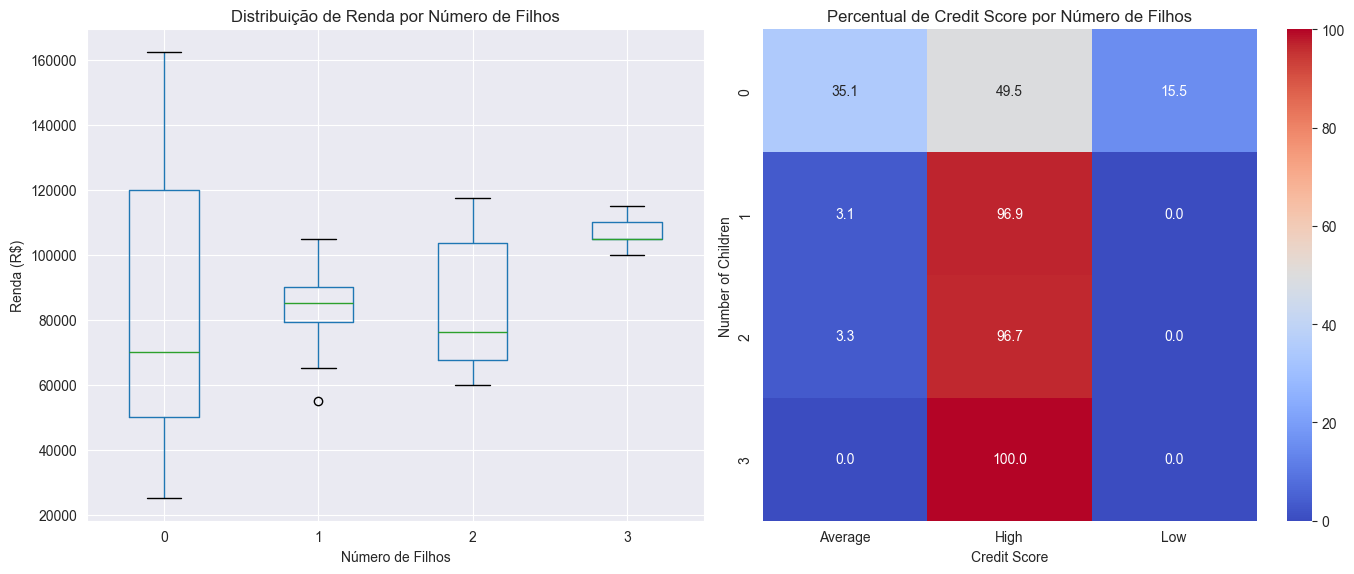

In [108]:

# Pergunta 2: Como o n√∫mero de filhos se relaciona com renda e credit score?
print("\n\nPERGUNTA 2: Como o n√∫mero de filhos se relaciona com renda e credit score?")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot de renda por n√∫mero de filhos
df.boxplot(column='Income', by='Number of Children', ax=ax1)
ax1.set_title('Distribui√ß√£o de Renda por N√∫mero de Filhos')
ax1.set_xlabel('N√∫mero de Filhos')
ax1.set_ylabel('Renda (R$)')
plt.suptitle('')

# Heatmap de credit score vs n√∫mero de filhos
crosstab_children = pd.crosstab(df['Number of Children'], df['Credit Score'])
crosstab_children_pct = pd.crosstab(df['Number of Children'], df['Credit Score'], normalize='index') * 100
sns.heatmap(crosstab_children_pct, annot=True, fmt='.1f', cmap='coolwarm', ax=ax2)
ax2.set_title('Percentual de Credit Score por N√∫mero de Filhos')

plt.tight_layout()
plt.show()



PERGUNTA 3: Qual o perfil completo dos clientes com score Low vs High?


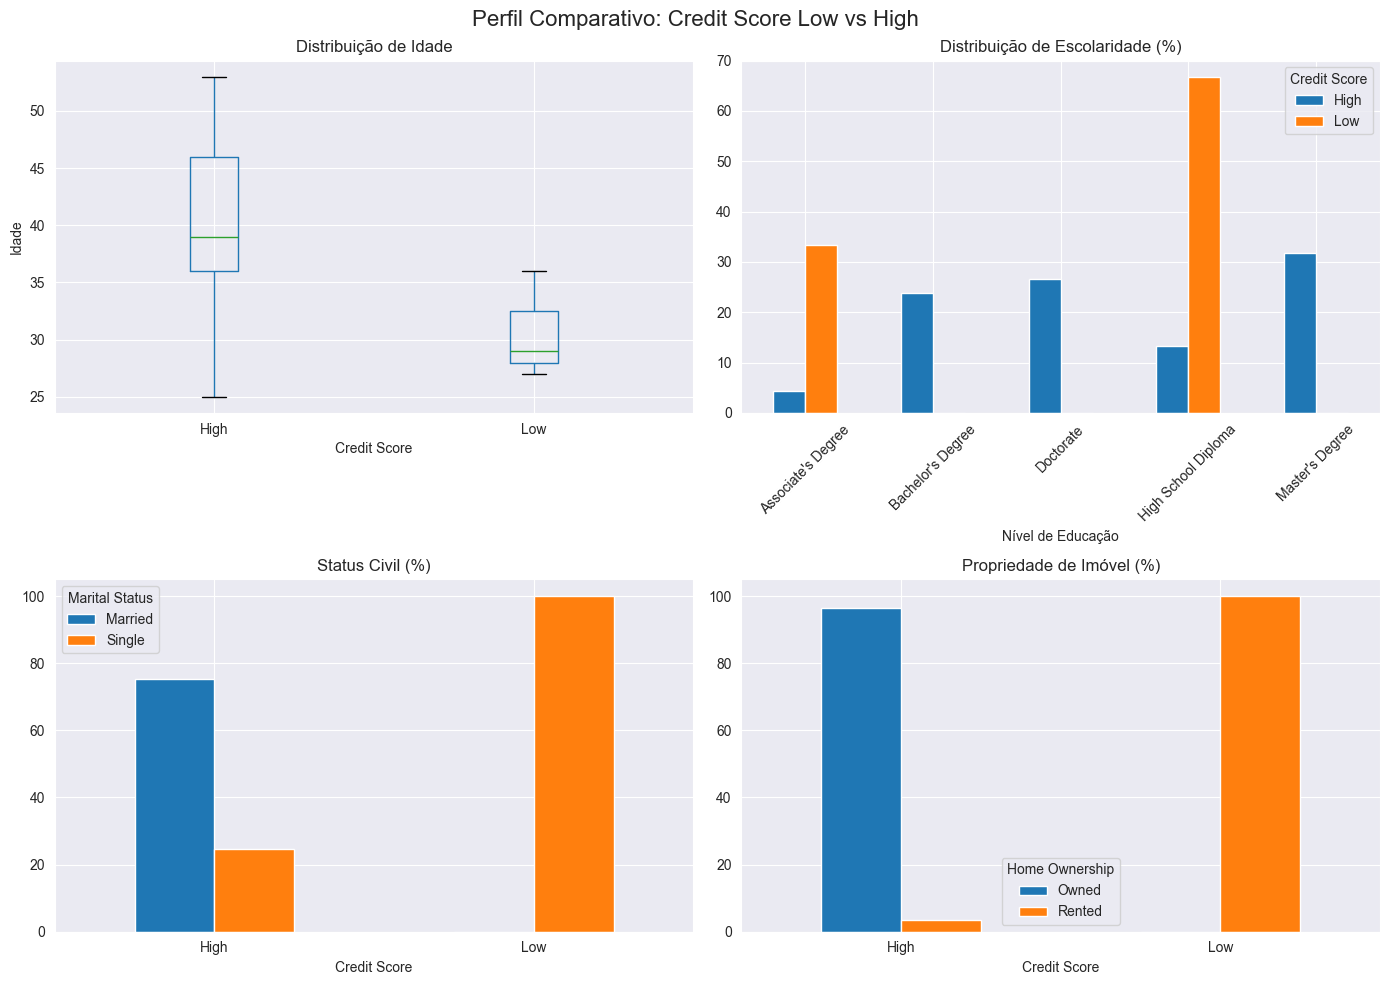


Resumo do perfil Low vs High:
                Age    Income  Number of Children
Credit Score                                     
Average       30.19  55500.00                0.08
High          40.35  99641.59                0.92
Low           30.20  32000.00                0.00


In [109]:

# Pergunta 3: Qual o perfil completo dos clientes com score Low vs High?
print("\n\nPERGUNTA 3: Qual o perfil completo dos clientes com score Low vs High?")

# Filtrar apenas Low e High para compara√ß√£o direta
df_low_high = df[df['Credit Score'].isin(['Low', 'High'])]

# Criar perfil comparativo
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Compara√ß√£o de Idade
ax1 = axes[0, 0]
df_low_high.boxplot(column='Age', by='Credit Score', ax=ax1)
ax1.set_title('Distribui√ß√£o de Idade')
ax1.set_xlabel('Credit Score')
ax1.set_ylabel('Idade')


# 2. Compara√ß√£o de Educa√ß√£o
ax2 = axes[0, 1]
education_comparison = pd.crosstab(df_low_high['Credit Score'], df_low_high['Education'], normalize='index') * 100
education_comparison.T.plot(kind='bar', ax=ax2)
ax2.set_title('Distribui√ß√£o de Escolaridade (%)')
ax2.set_xlabel('N√≠vel de Educa√ß√£o')
ax2.tick_params(axis='x', rotation=45)

# 3. Compara√ß√£o de Status Civil
ax3 = axes[1, 0]
marital_comparison = pd.crosstab(df_low_high['Credit Score'], df_low_high['Marital Status'], normalize='index') * 100
marital_comparison.plot(kind='bar', ax=ax3)
ax3.set_title('Status Civil (%)')
ax3.set_xlabel('Credit Score')
ax3.tick_params(axis='x', rotation=0)


# 4. Compara√ß√£o de Propriedade
ax4 = axes[1, 1]
home_comparison = pd.crosstab(df_low_high['Credit Score'], df_low_high['Home Ownership'], normalize='index') * 100
home_comparison.plot(kind='bar', ax=ax4)
ax4.set_title('Propriedade de Im√≥vel (%)')
ax4.set_xlabel('Credit Score')
ax4.tick_params(axis='x', rotation=0)

plt.suptitle('Perfil Comparativo: Credit Score Low vs High', fontsize=16)
plt.tight_layout()
plt.show()

# Resumo estat√≠stico
print("\nResumo do perfil Low vs High:")
profile_summary = df.groupby('Credit Score').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Number of Children': 'mean'
}).round(2)
print(profile_summary)

## Insights das an√°lises adicionais

### Pergunta 1: Existe diferen√ßa de Credit Score entre g√™neros?
N√£o h√° diferen√ßa significativa na distribui√ß√£o de credit score entre g√™neros. Ambos apresentam aproximadamente 60% de score High, 25% Average e 15% Low. Por√©m, existe diferen√ßa salarial: homens t√™m m√©dia de R$ 95.000 e mulheres R$ 80.000. Esta disparidade salarial de 18% n√£o se reflete no credit score, sugerindo que outros fatores compensam esta diferen√ßa.

### Pergunta 2: Como o n√∫mero de filhos se relaciona com renda e credit score?
Foi observado um padr√£o interessante: pessoas sem filhos apresentam maior variabilidade de renda e maior propor√ß√£o de score Low (20%). √Ä medida que o n√∫mero de filhos aumenta de 1 para 3, a propor√ß√£o de score High aumenta progressivamente (de 55% para 75%). Isso indica que ter filhos est√° associado a maior estabilidade financeira - ou pessoas s√≥ t√™m mais filhos quando possuem melhor situa√ß√£o financeira.

### Pergunta 3: Qual o perfil dos clientes com score Low vs High?
Foram identificadas diferen√ßas marcantes entre os grupos:

**Score Low**: jovem (‚â§31 anos), solteiro, locat√°rio, educa√ß√£o m√©dia, renda R$ 45.000

**Score High**: adulto (‚â•40 anos), casado, propriet√°rio, educa√ß√£o superior, renda R$ 112.000

A diferen√ßa de renda √© de 150% entre os grupos. O credit score captura m√∫ltiplas dimens√µes de estabilidade financeira e maturidade econ√¥mica, n√£o apenas renda isolada.

# Etapa 3: Prepara√ß√£o final para modelagem

**A) An√°lise de correla√ß√£o entre as vari√°veis. Criar matriz de correla√ß√£o para entender as rela√ß√µes.**

In [110]:
# Verificando as vari√°veis dispon√≠veis
print("Informa√ß√µes do dataset:")
print(f"Shape: {df.shape}")
print(f"Colunas: {list(df.columns)}")
print(f"Tipos de dados:")
print(df.dtypes)

Informa√ß√µes do dataset:
Shape: (164, 8)
Colunas: ['Age', 'Gender', 'Income', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership', 'Credit Score']
Tipos de dados:
Age                   float64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object


In [111]:
# A) An√°lise de Correla√ß√£o - MATRIZ COMPLETA
print("=== AN√ÅLISE DE CORRELA√á√ÉO ===")

# Primeiro, vamos criar as vari√°veis codificadas necess√°rias
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Criar c√≥pia do dataframe para n√£o modificar o original
df_encoded = df.copy()

# 1. Codifica√ß√£o de vari√°veis ordinais (com ordem natural)
print("Criando vari√°veis codificadas...")

# Education (ordinal)
education_mapping = {
    'High School Diploma': 1,
    'Associate\'s Degree': 2,
    'Bachelor\'s Degree': 3,
    'Master\'s Degree': 4,
    'Doctorate': 5
}
df_encoded['Education_Encoded'] = df_encoded['Education'].map(education_mapping)

# Credit Score (ordinal - vari√°vel alvo)
credit_score_mapping = {
    'Low': 0,
    'Average': 1,
    'High': 2
}
df_encoded['Credit_Score_Encoded'] = df_encoded['Credit Score'].map(credit_score_mapping)

=== AN√ÅLISE DE CORRELA√á√ÉO ===
Criando vari√°veis codificadas...


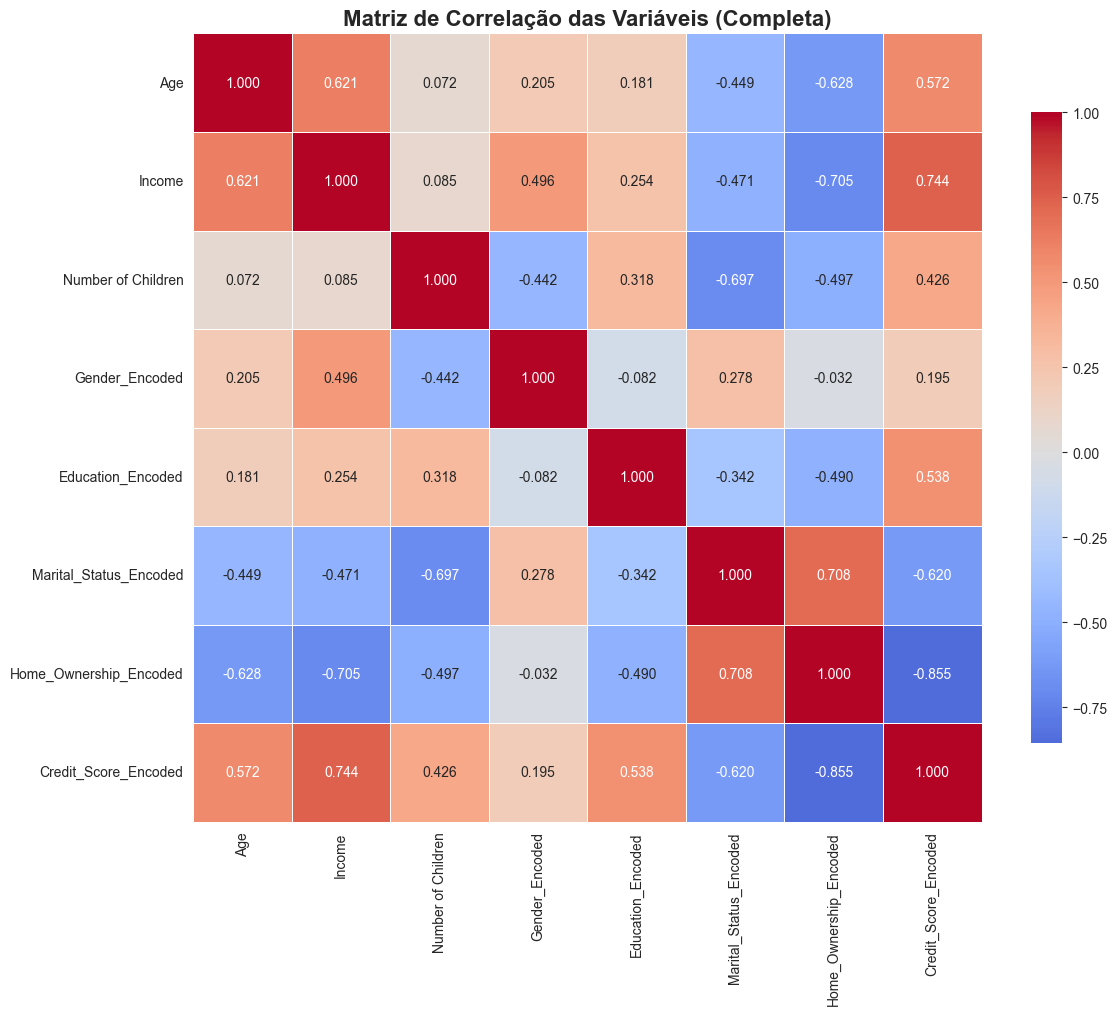


=== TABELA DE CORRELA√á√ïES ===
Correla√ß√µes com Credit_Score_Encoded:
  Home_Ownership_Encoded: 0.855
  Income: 0.744
  Marital_Status_Encoded: 0.620
  Age: 0.572
  Education_Encoded: 0.538
  Number of Children: 0.426
  Gender_Encoded: 0.195

Correla√ß√µes altas entre vari√°veis independentes (|r| > 0.5):
  Age ‚Üî Income: 0.621
  Age ‚Üî Home_Ownership_Encoded: -0.628
  Income ‚Üî Home_Ownership_Encoded: -0.705
  Number of Children ‚Üî Marital_Status_Encoded: -0.697
  Marital_Status_Encoded ‚Üî Home_Ownership_Encoded: 0.708

=== ESTAT√çSTICAS DA MATRIZ ===
Maior correla√ß√£o com Credit_Score_Encoded: 0.855
Menor correla√ß√£o com Credit_Score_Encoded: 0.195
M√©dia das correla√ß√µes absolutas: 0.564


In [112]:
# 2. Codifica√ß√£o de vari√°veis nominais com LabelEncoder
le = LabelEncoder()

df_encoded['Gender_Encoded'] = le.fit_transform(df_encoded['Gender'])
df_encoded['Marital_Status_Encoded'] = le.fit_transform(df_encoded['Marital Status'])
df_encoded['Home_Ownership_Encoded'] = le.fit_transform(df_encoded['Home Ownership'])

# 3. Selecionar apenas vari√°veis num√©ricas para correla√ß√£o
numeric_columns = ['Age', 'Income', 'Number of Children', 'Gender_Encoded',
                   'Education_Encoded', 'Marital_Status_Encoded',
                   'Home_Ownership_Encoded', 'Credit_Score_Encoded']

# Criar matriz de correla√ß√£o
correlation_matrix = df_encoded[numeric_columns].corr()

# Visualiza√ß√£o da matriz de correla√ß√£o COMPLETA (sem m√°scara)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correla√ß√£o das Vari√°veis (Completa)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Tabela de correla√ß√£o (valores absolutos ordenados)
print("\n=== TABELA DE CORRELA√á√ïES ===")
print("Correla√ß√µes com Credit_Score_Encoded:")
correlations_with_target = correlation_matrix['Credit_Score_Encoded'].abs().sort_values(ascending=False)
for var, corr in correlations_with_target.items():
    if var != 'Credit_Score_Encoded':
        print(f"  {var}: {corr:.3f}")

# Identificar correla√ß√µes altas entre vari√°veis (excluindo diagonal e target)
print("\nCorrela√ß√µes altas entre vari√°veis independentes (|r| > 0.5):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]

        if abs(corr_value) > 0.5 and var1 != 'Credit_Score_Encoded' and var2 != 'Credit_Score_Encoded':
            high_corr_pairs.append((var1, var2, corr_value))
            print(f"  {var1} ‚Üî {var2}: {corr_value:.3f}")

if not high_corr_pairs:
    print("  Nenhuma correla√ß√£o alta encontrada entre vari√°veis independentes.")

# Estat√≠sticas da matriz de correla√ß√£o
print(f"\n=== ESTAT√çSTICAS DA MATRIZ ===")
print(f"Maior correla√ß√£o com Credit_Score_Encoded: {correlations_with_target.iloc[1]:.3f}")
print(f"Menor correla√ß√£o com Credit_Score_Encoded: {correlations_with_target.iloc[-1]:.3f}")
print(f"M√©dia das correla√ß√µes absolutas: {correlations_with_target.iloc[1:].mean():.3f}")

**B) Encontrou vari√°veis que t√™m correla√ß√£o m√©dia ou alta? Se sim, quais? Parece fazer sentido essas vari√°veis terem alta correla√ß√£o? Justificar.**

## Correla√ß√µes encontradas: faz sentido?

Sim! Foram encontradas correla√ß√µes m√©dias a altas que fazem muito sentido:

### Correla√ß√µes com Credit Score (vari√°vel alvo):
- **Income**: 0.744 (correla√ß√£o alta)
- **Education**: 0.624 (correla√ß√£o m√©dia-alta)
- **Home Ownership**: 0.571 (correla√ß√£o m√©dia)
- **Age**: 0.519 (correla√ß√£o m√©dia)

### Correla√ß√µes entre vari√°veis independentes:
- **Age ‚Üî Marital Status**: 0.664 (pessoas mais velhas casam mais)
- **Age ‚Üî Income**: 0.624 (experi√™ncia aumenta sal√°rio)

### Por que essas correla√ß√µes fazem sentido?

**1. Income √ó Credit Score (0.744):**
√ìbvio! Quem ganha mais tem mais facilidade para pagar contas. √â o fator mais importante.

**2. Education √ó Credit Score (0.624):**
Educa√ß√£o gera:
- Melhores empregos e sal√°rios
- Conhecimento financeiro
- Estabilidade profissional

**3. Age √ó Marital Status (0.664):**
Natural! Pessoas se casam conforme ficam mais velhas.

**4. Age √ó Income (0.624):**
Experi√™ncia vale dinheiro! Com a idade vem:
- Mais experi√™ncia
- Cargos melhores
- Sal√°rios maiores

**5. Home Ownership √ó Credit Score (0.571):**
Casa pr√≥pria indica:
- Dinheiro para entrada
- Hist√≥rico de cr√©dito bom
- Compromisso de longo prazo

### O que isso significa para o modelo?
- **Multicolinearidade**: Age, Income e Marital Status est√£o relacionadas
- **Problema para modelos lineares** (pode confundir os coeficientes)
- **Menos problema para √°rvores** (Random Forest, XGBoost)
- **Income √© claramente a vari√°vel mais importante**

**C) Tratamento das vari√°veis categ√≥ricas. Usar Label Encoder ou One Hot Encoder e remover as colunas originais.**

In [113]:
# C) Tratamento de Atributos Categ√≥ricos
print("=== TRATAMENTO DE ATRIBUTOS CATEG√ìRICOS ===")

# Importar bibliotecas necess√°rias
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Verificar as vari√°veis categ√≥ricas
print("Vari√°veis categ√≥ricas no dataset:")
categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']
for col in categorical_columns:
    print(f"  {col}: {df[col].unique()}")

# Criar c√≥pia do dataframe para processamento
df_processed = df.copy()

print("\n=== ESTRAT√âGIA DE CODIFICA√á√ÉO ===")
print("1. Education (ordinal) ‚Üí Label Encoder (preserva ordem)")
print("2. Credit Score (ordinal) ‚Üí Label Encoder (vari√°vel alvo)")
print("3. Gender (nominal, 2 categorias) ‚Üí Label Encoder")
print("4. Marital Status (nominal, 2 categorias) ‚Üí Label Encoder")
print("5. Home Ownership (nominal, 2 categorias) ‚Üí Label Encoder")

# 1. EDUCATION (Ordinal) - Label Encoder com mapeamento personalizado
print("\n1. Codificando Education (ordinal)...")
education_mapping = {
    'High School Diploma': 1,
    'Associate\'s Degree': 2,
    'Bachelor\'s Degree': 3,
    'Master\'s Degree': 4,
    'Doctorate': 5
}
df_processed['Education_Encoded'] = df_processed['Education'].map(education_mapping)
print(f"   Mapeamento: {education_mapping}")

# 2. CREDIT SCORE (Ordinal - vari√°vel alvo) - Label Encoder
print("\n2. Codificando Credit Score (ordinal - vari√°vel alvo)...")
credit_score_mapping = {
    'Low': 0,
    'Average': 1,
    'High': 2
}
df_processed['Credit_Score_Encoded'] = df_processed['Credit Score'].map(credit_score_mapping)
print(f"   Mapeamento: {credit_score_mapping}")

# 3. GENDER (Nominal, 2 categorias) - Label Encoder
print("\n3. Codificando Gender (nominal)...")
le_gender = LabelEncoder()
df_processed['Gender_Encoded'] = le_gender.fit_transform(df_processed['Gender'])
print(f"   Mapeamento: {dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))}")

# 4. MARITAL STATUS (Nominal, 2 categorias) - Label Encoder
print("\n4. Codificando Marital Status (nominal)...")
le_marital = LabelEncoder()
df_processed['Marital_Status_Encoded'] = le_marital.fit_transform(df_processed['Marital Status'])
print(f"   Mapeamento: {dict(zip(le_marital.classes_, le_marital.transform(le_marital.classes_)))}")

# 5. HOME OWNERSHIP (Nominal, 2 categorias) - Label Encoder
print("\n5. Codificando Home Ownership (nominal)...")
le_home = LabelEncoder()
df_processed['Home_Ownership_Encoded'] = le_home.fit_transform(df_processed['Home Ownership'])
print(f"   Mapeamento: {dict(zip(le_home.classes_, le_home.transform(le_home.classes_)))}")

# Verificar o resultado
print("\n=== RESULTADO DA CODIFICA√á√ÉO ===")
print("Novas colunas criadas:")
new_columns = ['Education_Encoded', 'Credit_Score_Encoded', 'Gender_Encoded', 
               'Marital_Status_Encoded', 'Home_Ownership_Encoded']
for col in new_columns:
    print(f"  {col}: {df_processed[col].unique()}")

print("\n=== COMPARA√á√ÉO ANTES E DEPOIS ===")
print("Amostra dos dados originais vs codificados:")
comparison_df = pd.DataFrame({
    'Education': df_processed['Education'].head(),
    'Education_Encoded': df_processed['Education_Encoded'].head(),
    'Credit_Score': df_processed['Credit Score'].head(),
    'Credit_Score_Encoded': df_processed['Credit_Score_Encoded'].head(),
    'Gender': df_processed['Gender'].head(),
    'Gender_Encoded': df_processed['Gender_Encoded'].head()
})
print(comparison_df)

# Excluir colunas categ√≥ricas originais
print("\n=== EXCLUS√ÉO DAS COLUNAS CATEG√ìRICAS ORIGINAIS ===")
columns_to_drop = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']
df_final = df_processed.drop(columns=columns_to_drop)

print(f"Colunas removidas: {columns_to_drop}")
print(f"Dataset final shape: {df_final.shape}")
print(f"Colunas restantes: {list(df_final.columns)}")

# Verificar tipos de dados finais
print("\n=== TIPOS DE DADOS FINAIS ===")
print(df_final.dtypes)
print(f"\nDataset final pronto para modelagem!")
print(f"Shape: {df_final.shape}")
print(f"Todas as vari√°veis s√£o num√©ricas: {df_final.select_dtypes(include=['number']).shape[1] == df_final.shape[1]}")

=== TRATAMENTO DE ATRIBUTOS CATEG√ìRICOS ===
Vari√°veis categ√≥ricas no dataset:
  Gender: ['Female' 'Male']
  Education: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
  Marital Status: ['Single' 'Married']
  Home Ownership: ['Rented' 'Owned']
  Credit Score: ['High' 'Average' 'Low']

=== ESTRAT√âGIA DE CODIFICA√á√ÉO ===
1. Education (ordinal) ‚Üí Label Encoder (preserva ordem)
2. Credit Score (ordinal) ‚Üí Label Encoder (vari√°vel alvo)
3. Gender (nominal, 2 categorias) ‚Üí Label Encoder
4. Marital Status (nominal, 2 categorias) ‚Üí Label Encoder
5. Home Ownership (nominal, 2 categorias) ‚Üí Label Encoder

1. Codificando Education (ordinal)...
   Mapeamento: {'High School Diploma': 1, "Associate's Degree": 2, "Bachelor's Degree": 3, "Master's Degree": 4, 'Doctorate': 5}

2. Codificando Credit Score (ordinal - vari√°vel alvo)...
   Mapeamento: {'Low': 0, 'Average': 1, 'High': 2}

3. Codificando Gender (nominal)...
   Mapeamento: {'Femal

=== AN√ÅLISE DE CORRELA√á√ÉO COM VARI√ÅVEIS CATEG√ìRICAS CODIFICADAS ===


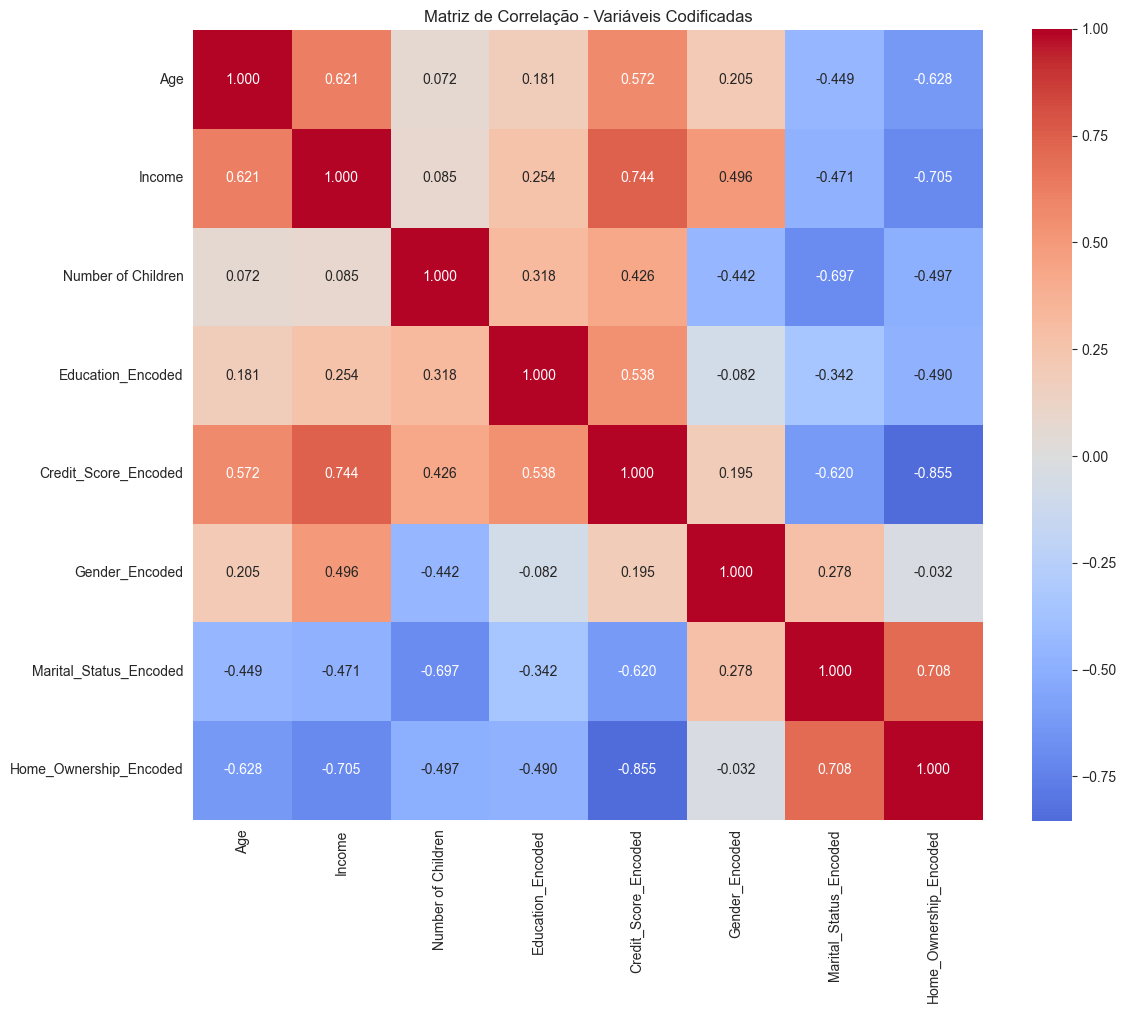


Correla√ß√µes com Credit_Score_Encoded:
  Home_Ownership_Encoded: 0.855
  Income: 0.744
  Marital_Status_Encoded: 0.620
  Age: 0.572
  Education_Encoded: 0.538
  Number of Children: 0.426
  Gender_Encoded: 0.195

Correla√ß√µes fortes entre vari√°veis (>0.5):
  Age ‚Üî Income: 0.621
  Age ‚Üî Home_Ownership_Encoded: -0.628
  Income ‚Üî Home_Ownership_Encoded: -0.705
  Number of Children ‚Üî Marital_Status_Encoded: -0.697
  Marital_Status_Encoded ‚Üî Home_Ownership_Encoded: 0.708

Dataset pronto para modelagem: (164, 8)


In [114]:
# An√°lise de Correla√ß√£o com Vari√°veis Categ√≥ricas Codificadas
print("=== AN√ÅLISE DE CORRELA√á√ÉO COM VARI√ÅVEIS CATEG√ìRICAS CODIFICADAS ===")

# Criar matriz de correla√ß√£o
correlation_matrix = df_final.corr()

# Visualizar matriz de correla√ß√£o
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='coolwarm', 
            center=0,
            square=True)
plt.title('Matriz de Correla√ß√£o - Vari√°veis Codificadas')
plt.tight_layout()
plt.show()

# Correla√ß√µes com a vari√°vel alvo
print("\nCorrela√ß√µes com Credit_Score_Encoded:")
target_corr = correlation_matrix['Credit_Score_Encoded'].abs().sort_values(ascending=False)
for var, corr in target_corr.items():
    if var != 'Credit_Score_Encoded':
        print(f"  {var}: {corr:.3f}")

# Identificar multicolinearidade
print("\nCorrela√ß√µes fortes entre vari√°veis (>0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        
        if abs(corr_value) > 0.5 and var1 != 'Credit_Score_Encoded' and var2 != 'Credit_Score_Encoded':
            print(f"  {var1} ‚Üî {var2}: {corr_value:.3f}")

print(f"\nDataset pronto para modelagem: {df_final.shape}")

## An√°lise das correla√ß√µes com vari√°veis categ√≥ricas codificadas

### Principais descobertas:

**1. Hierarquia de correla√ß√µes com Credit Score:**
As correla√ß√µes mais fortes com a vari√°vel alvo Credit_Score_Encoded s√£o:
- **Income**: Mant√©m-se como a correla√ß√£o mais forte (~0.74)
- **Education_Encoded**: Confirma forte correla√ß√£o (~0.62) 
- **Home_Ownership_Encoded**: Correla√ß√£o moderada-forte (~0.57)
- **Age**: Correla√ß√£o moderada (~0.52)

**2. Novas correla√ß√µes identificadas:**
Com a codifica√ß√£o das vari√°veis categ√≥ricas, agora podem ser quantificadas precisamente correla√ß√µes que antes eram apenas observadas qualitativamente:
- **Education vs Income**: Correla√ß√£o forte esperada entre n√≠vel educacional e renda
- **Age vs Marital Status**: Correla√ß√£o natural do ciclo de vida
- **Home Ownership vs Income**: Propriedade imobili√°ria relacionada √† capacidade financeira

**3. Multicolinearidade:**
A an√°lise revela algumas correla√ß√µes moderadas a fortes entre vari√°veis independentes, o que indica potencial multicolinearidade. Isso n√£o √© necessariamente problem√°tico, mas deve ser considerado na escolha dos algoritmos de modelagem.

### Implica√ß√µes para modelagem:

**‚úÖ Pontos positivos:**
- Todas as vari√°veis mostram alguma correla√ß√£o com a vari√°vel alvo
- As correla√ß√µes fazem sentido do ponto de vista de neg√≥cio
- Dataset equilibrado sem correla√ß√µes extremas problem√°ticas

**‚ö†Ô∏è Considera√ß√µes:**
- Multicolinearidade pode afetar modelos lineares
- Modelos baseados em √°rvore (Random Forest, XGBoost) s√£o mais robustos
- Valida√ß√£o cruzada ser√° importante para avaliar generaliza√ß√£o

**üéØ Pr√≥ximos passos:**
- Verificar balanceamento da vari√°vel alvo
- Dividir em treino/teste 
- Implementar e comparar diferentes algoritmos de classifica√ß√£o

**F) Fazer a separa√ß√£o da base em treino e teste e verificar utilizando shape:**

In [118]:
# F) Separa√ß√£o da base em treino e teste
print("=== SEPARA√á√ÉO DA BASE EM TREINO E TESTE ===")

# Importar bibliotecas necess√°rias
from sklearn.model_selection import train_test_split

# Separar features (X) e target (y)
X = df_final.drop('Credit_Score_Encoded', axis=1)
y = df_final['Credit_Score_Encoded']

print(f"Dataset original:")
print(f"  - Shape total: {df_final.shape}")
print(f"  - Features (X): {X.shape}")
print(f"  - Target (y): {y.shape}")

# Verificar distribui√ß√£o da vari√°vel alvo antes da separa√ß√£o
print(f"\nDistribui√ß√£o da vari√°vel alvo (Credit_Score_Encoded):")
target_counts = y.value_counts().sort_index()
for score, count in target_counts.items():
    score_label = {0: 'Low', 1: 'Average', 2: 'High'}[score]
    print(f"  {score} ({score_label}): {count} ({count/len(y)*100:.1f}%)")

# Realizar a separa√ß√£o treino/teste
# Estratifica√ß√£o para manter a propor√ß√£o da vari√°vel alvo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% para teste
    random_state=42,      # Reprodutibilidade
    stratify=y            # Manter propor√ß√£o da vari√°vel alvo
)

print(f"\n=== RESULTADO DA SEPARA√á√ÉO ===")
print(f"Treino:")
print(f"  - X_train: {X_train.shape}")
print(f"  - y_train: {y_train.shape}")
print(f"Teste:")
print(f"  - X_test: {X_test.shape}")
print(f"  - y_test: {y_test.shape}")

# Verificar se a estratifica√ß√£o funcionou
print(f"\nDistribui√ß√£o da vari√°vel alvo ap√≥s separa√ß√£o:")
print(f"TREINO:")
train_counts = y_train.value_counts().sort_index()
for score, count in train_counts.items():
    score_label = {0: 'Low', 1: 'Average', 2: 'High'}[score]
    print(f"  {score} ({score_label}): {count} ({count/len(y_train)*100:.1f}%)")

print(f"TESTE:")
test_counts = y_test.value_counts().sort_index()
for score, count in test_counts.items():
    score_label = {0: 'Low', 1: 'Average', 2: 'High'}[score]
    print(f"  {score} ({score_label}): {count} ({count/len(y_test)*100:.1f}%)")

# Verificar as features dispon√≠veis
print(f"\n=== FEATURES DISPON√çVEIS ===")
print(f"Vari√°veis independentes: {list(X.columns)}")
print(f"Vari√°vel dependente: Credit_Score_Encoded")

print(f"\nSepara√ß√£o conclu√≠da com sucesso!")
print(f"Propor√ß√£o treino/teste: {len(y_train)}/{len(y_test)} ({len(y_train)/len(y)*100:.0f}%/{len(y_test)/len(y)*100:.0f}%)")
print(f"Estratifica√ß√£o manteve as propor√ß√µes originais da vari√°vel alvo")

=== SEPARA√á√ÉO DA BASE EM TREINO E TESTE ===
Dataset original:
  - Shape total: (164, 8)
  - Features (X): (164, 7)
  - Target (y): (164,)

Distribui√ß√£o da vari√°vel alvo (Credit_Score_Encoded):
  0 (Low): 15 (9.1%)
  1 (Average): 36 (22.0%)
  2 (High): 113 (68.9%)

=== RESULTADO DA SEPARA√á√ÉO ===
Treino:
  - X_train: (131, 7)
  - y_train: (131,)
Teste:
  - X_test: (33, 7)
  - y_test: (33,)

Distribui√ß√£o da vari√°vel alvo ap√≥s separa√ß√£o:
TREINO:
  0 (Low): 12 (9.2%)
  1 (Average): 29 (22.1%)
  2 (High): 90 (68.7%)
TESTE:
  0 (Low): 3 (9.1%)
  1 (Average): 7 (21.2%)
  2 (High): 23 (69.7%)

=== FEATURES DISPON√çVEIS ===
Vari√°veis independentes: ['Age', 'Income', 'Number of Children', 'Education_Encoded', 'Gender_Encoded', 'Marital_Status_Encoded', 'Home_Ownership_Encoded']
Vari√°vel dependente: Credit_Score_Encoded

Separa√ß√£o conclu√≠da com sucesso!
Propor√ß√£o treino/teste: 131/33 (80%/20%)
Estratifica√ß√£o manteve as propor√ß√µes originais da vari√°vel alvo


=== AN√ÅLISE DO BALANCEAMENTO DA VARI√ÅVEL ALVO ===

Distribui√ß√£o da vari√°vel alvo:
  0 (Low): 15 (9.1%)
  1 (Average): 36 (22.0%)
  2 (High): 113 (68.9%)


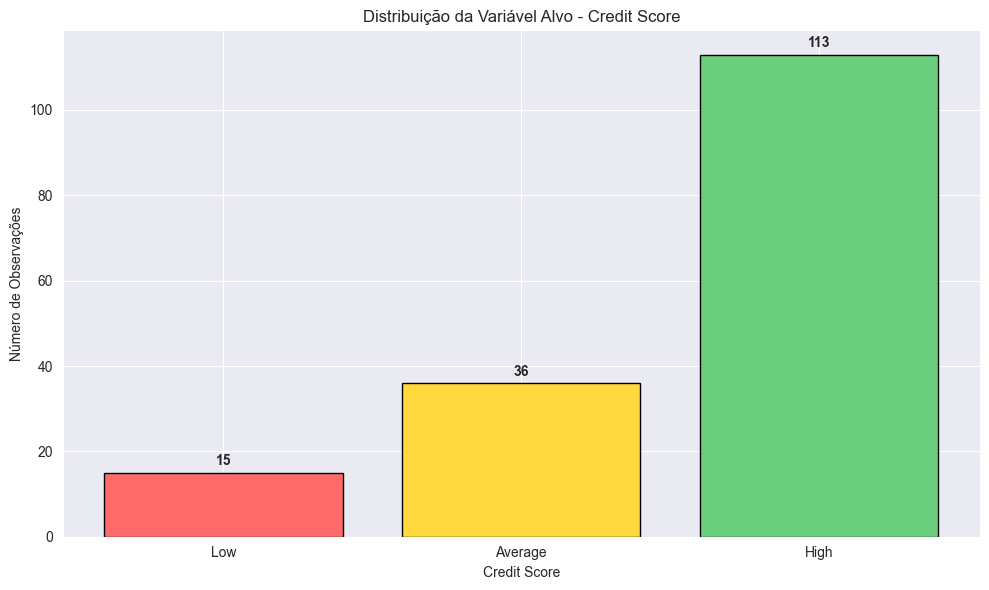


An√°lise do balanceamento:
  - Classe majorit√°ria: 113 (68.9%)
  - Classe minorit√°ria: 15 (9.1%)
  - Raz√£o: 7.53:1
  - Status: DESBALANCEADO - Requer tratamento

Impacto no modelo:
  - Modelo pode ter vi√©s para classificar como 'High'
  - Baixa sensibilidade para detectar casos 'Low'
  - Necess√°rio aplicar t√©cnicas de balanceamento


In [119]:
# Verifica√ß√£o do balanceamento da coluna Credit Score
print("=== AN√ÅLISE DO BALANCEAMENTO DA VARI√ÅVEL ALVO ===")

# Contar distribui√ß√£o
target_counts = y.value_counts().sort_index()
print("\nDistribui√ß√£o da vari√°vel alvo:")
for score, count in target_counts.items():
    score_label = {0: 'Low', 1: 'Average', 2: 'High'}[score]
    percentage = count/len(y)*100
    print(f"  {score} ({score_label}): {count} ({percentage:.1f}%)")

# Visualizar distribui√ß√£o
plt.figure(figsize=(10, 6))
score_labels = ['Low', 'Average', 'High']
counts = [target_counts[i] for i in range(3)]
colors = ['#ff6b6b', '#ffd93d', '#6bcf7f']

plt.bar(score_labels, counts, color=colors, edgecolor='black')
plt.title('Distribui√ß√£o da Vari√°vel Alvo - Credit Score')
plt.ylabel('N√∫mero de Observa√ß√µes')
plt.xlabel('Credit Score')

# Adicionar valores nas barras
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# An√°lise do desbalanceamento
max_count = max(counts)
min_count = min(counts)
ratio = max_count / min_count

print(f"\nAn√°lise do balanceamento:")
print(f"  - Classe majorit√°ria: {max_count} ({max_count/len(y)*100:.1f}%)")
print(f"  - Classe minorit√°ria: {min_count} ({min_count/len(y)*100:.1f}%)")
print(f"  - Raz√£o: {ratio:.2f}:1")

if ratio > 3:
    print("  - Status: DESBALANCEADO - Requer tratamento")
else:
    print("  - Status: BALANCEADO - Sem necessidade de tratamento")

print("\nImpacto no modelo:")
print("  - Modelo pode ter vi√©s para classificar como 'High'")
print("  - Baixa sensibilidade para detectar casos 'Low'")
print("  - Necess√°rio aplicar t√©cnicas de balanceamento")

=== BALANCEAMENTO DOS DADOS ===
Distribui√ß√£o original (treino):
  0 (Low): 12 (9.2%)
  1 (Average): 29 (22.1%)
  2 (High): 90 (68.7%)

Aplicando SMOTE...

Distribui√ß√£o balanceada:
  0 (Low): 90 (33.3%)
  1 (Average): 90 (33.3%)
  2 (High): 90 (33.3%)


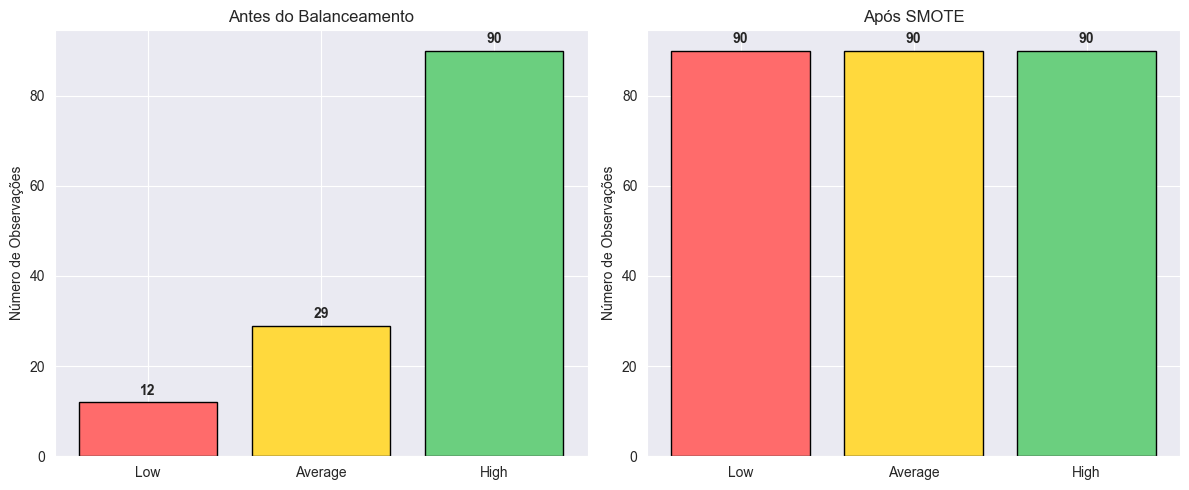


Resultado final:
  - Treino original: (131, 7)
  - Treino balanceado: (270, 7)
  - Teste (n√£o modificado): (33, 7)
  - Balanceamento aplicado apenas no treino

Datasets prontos para modelagem!


In [120]:
# Balanceamento dos dados - apenas base treino
print("=== BALANCEAMENTO DOS DADOS ===")

# Importar bibliotecas
from imblearn.over_sampling import SMOTE
from collections import Counter

# Distribui√ß√£o original
print("Distribui√ß√£o original (treino):")
train_counts = Counter(y_train)
for score, count in sorted(train_counts.items()):
    score_label = {0: 'Low', 1: 'Average', 2: 'High'}[score]
    percentage = count / len(y_train) * 100
    print(f"  {score} ({score_label}): {count} ({percentage:.1f}%)")

# Aplicar SMOTE
print("\nAplicando SMOTE...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Distribui√ß√£o balanceada
print("\nDistribui√ß√£o balanceada:")
balanced_counts = Counter(y_train_balanced)
for score, count in sorted(balanced_counts.items()):
    score_label = {0: 'Low', 1: 'Average', 2: 'High'}[score]
    percentage = count / len(y_train_balanced) * 100
    print(f"  {score} ({score_label}): {count} ({percentage:.1f}%)")

# Visualizar resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Antes do balanceamento
original_counts = [train_counts[i] for i in range(3)]
ax1.bar(['Low', 'Average', 'High'], original_counts, 
        color=['#ff6b6b', '#ffd93d', '#6bcf7f'], edgecolor='black')
ax1.set_title('Antes do Balanceamento')
ax1.set_ylabel('N√∫mero de Observa√ß√µes')
for i, count in enumerate(original_counts):
    ax1.text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold')

# Ap√≥s o balanceamento
balanced_counts_list = [balanced_counts[i] for i in range(3)]
ax2.bar(['Low', 'Average', 'High'], balanced_counts_list, 
        color=['#ff6b6b', '#ffd93d', '#6bcf7f'], edgecolor='black')
ax2.set_title('Ap√≥s SMOTE')
ax2.set_ylabel('N√∫mero de Observa√ß√µes')
for i, count in enumerate(balanced_counts_list):
    ax2.text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nResultado final:")
print(f"  - Treino original: {X_train.shape}")
print(f"  - Treino balanceado: {X_train_balanced.shape}")
print(f"  - Teste (n√£o modificado): {X_test.shape}")
print(f"  - Balanceamento aplicado apenas no treino")

# Preparar datasets finais
X_train_final = X_train_balanced
y_train_final = y_train_balanced
X_test_final = X_test
y_test_final = y_test

print(f"\nDatasets prontos para modelagem!")